In [41]:
from datetime import date, datetime
import random
import string
import math
import numpy as np
import matplotlib.pyplot as plt

In [42]:
class RocketSimulator:
    def __init__(self, initial_altitude, initial_latitude, initial_longitude, max_thrust, thrust_duration, initial_temp):
        self.g = 9.81  # Gravitational acceleration (m/s^2)
        self.flight_stage = 'On Pad'
        self.velocity = np.array([0., 0., 0.])  # Velocity in x, y, z
        self.altitude = initial_altitude
        self.acceleration = np.array([0., 0., -self.g])  # Acceleration in x, y, z
        self.orientation = np.array([0., 0., 0.])  # Orientation in roll, pitch, yaw
        self.max_thrust = max_thrust  # Maximum thrust
        self.thrust_duration = thrust_duration  # Duration of the thrust
        self.latitude = initial_latitude
        self.longitude = initial_longitude
        self.temperature = initial_temp

    def thrust(self, time_elapsed):
        if time_elapsed < self.thrust_duration:
            # Linearly decrease thrust over time
            return self.max_thrust * (1 - time_elapsed / self.thrust_duration)
        else:
            return 0

    def update(self, time_step, time_elapsed):
        # Calculate current thrust and resulting acceleration
        current_thrust = self.thrust(time_elapsed)

        if self.flight_stage == 'Main':
            self.acceleration = np.array([0., 0., -self.g/20])
        else:
            self.acceleration = np.array([0., 0., current_thrust - self.g])

        # Add random disturbances to x and y axes
        self.acceleration[:2] += np.random.uniform(-0.1, 0.1, 2)

        # Updates
        self.velocity += self.acceleration * time_step
        self.altitude += self.velocity[2] * time_step + 0.5 * self.acceleration[2] * time_step**2
        self.latitude += random.uniform(0, 0.00001)
        self.longitude += random.uniform(0, 0.00001)
        self.orientation += np.random.uniform(-0.1, 0.1, 3)  # Random small changes to roll, pitch, yaw
        self.temperature -= 0.1

        if self.altitude < 0:
            self.altitude = 0

        # Update flight stage
        if self.acceleration[2] > 0:
            self.flight_stage = 'Liftoff'
        elif self.acceleration[2] < 0:
            self.flight_stage = 'Main'
        elif -0.1 < self.acceleration[2] < 0.1:
            self.flight_stage = 'Apogee'
        else:
            self.flight_stage = 'Down'

        return self.altitude, self.latitude, self.longitude, self.acceleration, self.orientation, self.temperature

In [43]:
# Simulation parameters
initial_altitude = 0            # Initial altitude in m  
max_thrust = 20                 # Maximum thrust in m/s^2
thrust_duration = 10            # Duration of the thrust in seconds
initial_temp = 15               # Initial temperature in degrees C
initial_latitude = 28.5721   
initial_longitude = -80.6480  

simulator = RocketSimulator(initial_altitude, initial_latitude, initial_longitude, max_thrust, thrust_duration, initial_temp)

time_step = 1           # Time step in seconds
total_time = 200        # Total simulation time in seconds
time_elapsed = 0

In [44]:
acc = []
ori = []
alt = []
time = []
lat = []

while time_elapsed <= total_time:
    altitude, latitude, long, acceleration, orientation,temp = simulator.update(time_step, time_elapsed)
    time_elapsed += time_step
    
    acc.append(acceleration)
    ori.append(orientation)
    alt.append(altitude)
    time.append(time_elapsed)
    lat.append(latitude)

    if altitude <= 0 and time_elapsed > thrust_duration:
        break  # Stop the simulation if the rocket has reached the ground

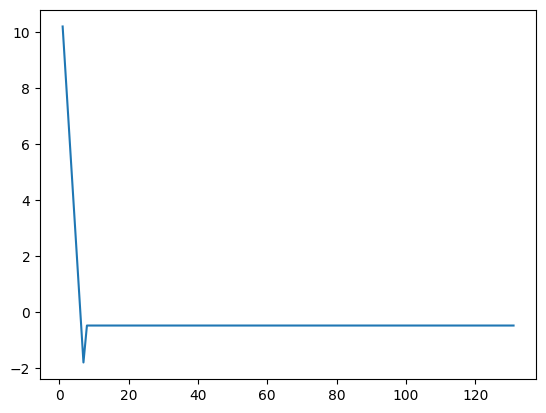

In [45]:
acc_z = [array[2] for array in acc]

plt.plot(time, acc_z)
plt.show()

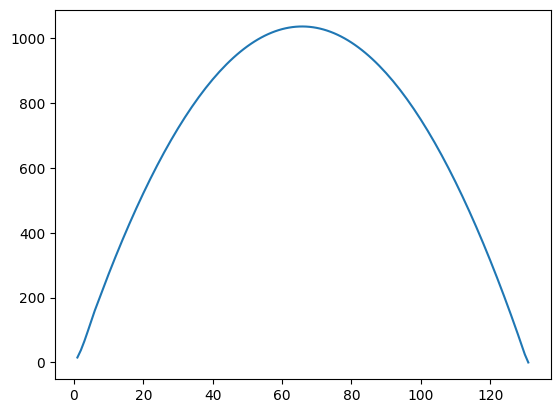

In [46]:
plt.plot(time, alt)
plt.show()

In [47]:
time

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131]